# EDA of HR dataset


### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import and Merge the data set

In [2]:
Applicationdata = pd.read_excel('HR-Records_Final.xlsx', sheet_name = 'Application data')
Candidatedata = pd.read_excel('HR-Records_Final.xlsx', sheet_name = 'Candidate Data')
Interviewdata = pd.read_excel('HR-Records_Final.xlsx', sheet_name = 'Interview Data ')
print(Applicationdata.dtypes)
print(Candidatedata.dtypes)
print(Interviewdata.dtypes)

Candidate ID                             object
Date of Application              datetime64[ns]
Date of Interview                datetime64[ns]
Date of Job Offer                datetime64[ns]
Date of Offer extension          datetime64[ns]
Date of Joining                  datetime64[ns]
Offered band                             object
Offered Salary                          float64
Percentage hike offered (CTC)           float64
Joining bonus amount                    float64
LOB                                      object
Joining location                         object
Candidate relocation status              object
Acceptance status                        object
dtype: object
Candidate ID                               object
Notice period                               int64
Current CTC                               float64
Current gross salary                        int64
Current organization                       object
Highest Educational Degree                 object
Total experien

### Cursory Data Analysis

In [3]:
df_merge1 = pd.merge(Applicationdata, Candidatedata, on="Candidate ID", how="outer")
Combinedata = pd.merge(df_merge1, Interviewdata, on="Candidate ID", how="outer")
Combinedata['Rejection status']=Combinedata['Acceptance status'].replace(to_replace="Joined",value=0)
Combinedata['Rejection status']=Combinedata['Rejection status'].replace(to_replace="Offer Rejected",value=1)
Combinedata=Combinedata.drop(['Acceptance status'], axis = 1) 

We have 37 columns in the dataset.


# Variable Types

<table align=left>
<tr><td style="text-align:left">Candidate ID </td><td style="text-align:left"> object</td><td style="text-align:left">Id column having sequence number data</td></tr>
<tr><td style="text-align:left">Date of Application </td><td style="text-align:left"> datetime64[ns]</td><td style="text-align:left">TimeSeriesdata</td></tr>
<tr><td style="text-align:left">Date of Interview </td><td style="text-align:left"> datetime64[ns]</td><td style="text-align:left">TimeSeriesdata</td></tr>
<tr><td style="text-align:left">Date of Job Offer </td><td style="text-align:left"> datetime64[ns]</td><td style="text-align:left">TimeSeriesdata</td></tr>
<tr><td style="text-align:left">Date of Offer extension </td><td style="text-align:left"> datetime64[ns]</td><td style="text-align:left">TimeSeriesdata</td></tr>
<tr><td style="text-align:left">Date of Joining </td><td style="text-align:left"> datetime64[ns]</td><td style="text-align:left">TimeSeriesdata</td></tr>
<tr><td style="text-align:left">Offered band </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having 7 classes</td></tr>
<tr><td style="text-align:left">Offered Salary </td><td style="text-align:left"> float64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Percentage hike offered (CTC) </td><td style="text-align:left"> float64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Joining bonus amount </td><td style="text-align:left"> float64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">LOB </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having 3 classes</td></tr>
<tr><td style="text-align:left">Joining location </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having 5 classes</td></tr>
<tr><td style="text-align:left">Candidate relocation status </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having 2 classes Y/N</td></tr>
<tr><td style="text-align:left">Acceptance status </td><td style="text-align:left"> object</td><td style="text-align:left">Dimension data having 2 classes Y/N. It is the target Variable having 2 discrete classes</td></tr>
<tr><td style="text-align:left">Notice period </td><td style="text-align:left"> int64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Current CTC </td><td style="text-align:left"> float64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Current gross salary </td><td style="text-align:left"> int64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Current organization </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having discrete classes</td></tr>
<tr><td style="text-align:left">Highest Educational Degree </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having discrete  classes</td></tr>
<tr><td style="text-align:left">Total experience </td><td style="text-align:left"> int64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Relevant experience </td><td style="text-align:left"> float64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Year of graduation </td><td style="text-align:left"> int64</td><td style="text-align:left">Year of graduation is  Catagorial data having too many classes</td></tr>
<tr><td style="text-align:left">Expected CTC </td><td style="text-align:left"> int64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Percentage hike (CTC) expected </td><td style="text-align:left"> float64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Gender </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having 2 classes M/F</td></tr>
<tr><td style="text-align:left">Candidate source </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having discrete  classes</td></tr>
<tr><td style="text-align:left">DOB </td><td style="text-align:left"> datetime64[ns]</td><td style="text-align:left">TimeSeriesdata</td></tr>
<tr><td style="text-align:left">Location </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having discrete  classes</td></tr>
<tr><td style="text-align:left">Number of precious jobs </td><td style="text-align:left"> int64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Written Test Date </td><td style="text-align:left"> datetime64[ns]</td><td style="text-align:left">TimeSeriesdata</td></tr>
<tr><td style="text-align:left">Interview rounds </td><td style="text-align:left"> int64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Date of first Interview </td><td style="text-align:left"> datetime64[ns]</td><td style="text-align:left">TimeSeriesdata</td></tr>
<tr><td style="text-align:left">Date of last Interview </td><td style="text-align:left"> datetime64[ns]</td><td style="text-align:left">TimeSeriesdata</td></tr>
<tr><td style="text-align:left">Interview types </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having discrete  classes</td></tr>
<tr><td style="text-align:left">Interview Types2 </td><td style="text-align:left"> object</td><td style="text-align:left">Catagorial data having discrete  classes</td></tr>
<tr><td style="text-align:left">First interview duration </td><td style="text-align:left"> int64</td><td style="text-align:left">Countinuous variable</td></tr>
<tr><td style="text-align:left">Last interaction duration </td><td style="text-align:left"> int64</td><td style="text-align:left">Countinuous variable</td></tr>

</table>

### Missing Data Investigation

In [4]:
# Checking for missing data in the given dataset
missing_data = Combinedata.isnull()
missing_data.head(5)

,Candidate ID,Date of Application,Date of Interview,Date of Job Offer,Date of Offer extension,Date of Joining,Offered band,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,...,Number of precious jobs,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,Interview types,Interview Types2,First interview duration,Last interaction duration,Rejection status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
print("Number of missing values in each column in the Data set :- \n", Combinedata.isnull().sum()) 

Number of missing values in each column in the Data set :- 
 Candidate ID                       0
Date of Application                0
Date of Interview                  0
Date of Job Offer                  0
Date of Offer extension            0
Date of Joining                    0
Offered band                       0
Offered Salary                     0
Percentage hike offered (CTC)      0
Joining bonus amount               0
LOB                                0
Joining location                   0
Candidate relocation status        0
Notice period                      0
Current CTC                        0
Current gross salary               0
Current organization               0
Highest Educational Degree         0
Total experience                   0
Relevant experience                0
Year of graduation                 0
Expected CTC                       0
Percentage hike (CTC) expected     0
Gender                             0
Candidate source                   0
DOB           

From the analysis we can see that there is no Missing data in the dataset.

### Redundant Data Investigation

In [6]:
# Checking for redundant data in the given dataset

len(Combinedata[Combinedata.duplicated()])

0

From the analysis we can see that there is no Redundant data in the dataset.

# Correlated Variables Investigation


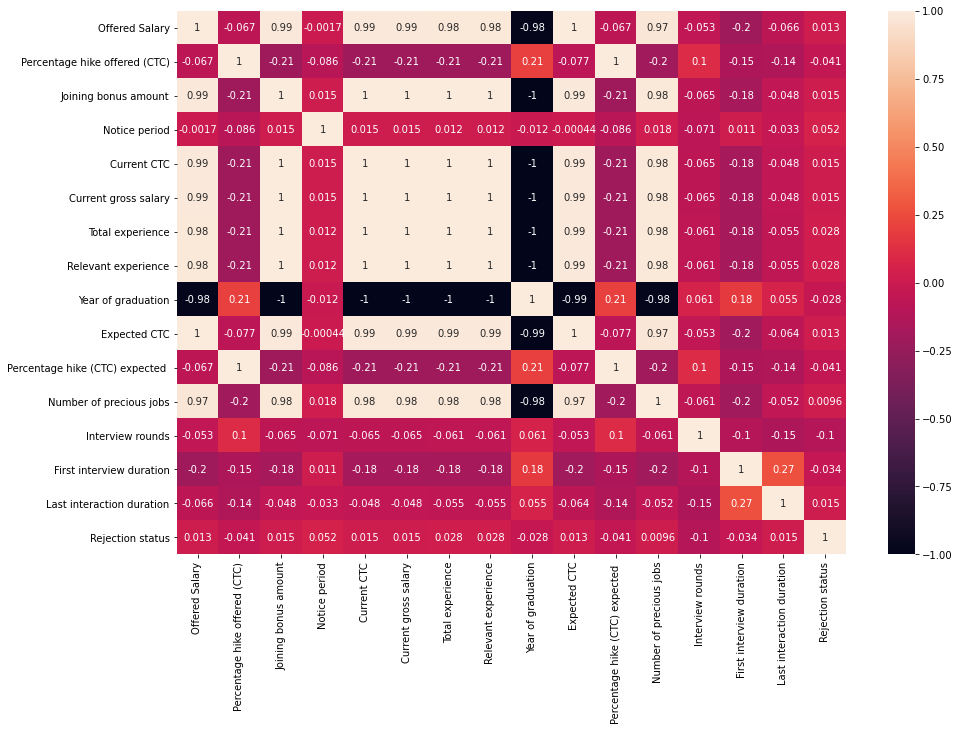

                                 Offered Salary  \
Offered Salary                         1.000000   
Percentage hike offered (CTC)         -0.066571   
Joining bonus amount                   0.986880   
Notice period                         -0.001660   
Current CTC                            0.986880   
Current gross salary                   0.986880   
Total experience                       0.983989   
Relevant experience                    0.983989   
Year of graduation                    -0.983989   
Expected CTC                           0.999929   
Percentage hike (CTC) expected        -0.066571   
Number of precious jobs                0.970064   
Interview rounds                      -0.052529   
First interview duration              -0.204745   
Last interaction duration             -0.065759   
Rejection status                       0.012688   

                                 Percentage hike offered (CTC)  \
Offered Salary                                       -0.066571   


In [7]:
plt.figure(figsize=(15, 10))
corr = Combinedata.corr()
sns.heatmap(corr, annot=True)
plt.show()
print(corr)


Using Correlation Matrix we are able to find the correlation between numeric features of the dataset.

Based on the Matrix we learn that the column "Joining bonus amount" has colinearity 1 with the "current ctc", "current gross salary", "total exp" and "relevant exp" columns.

We will drop the "Joining bonus", "current gross salary", "total exp" and "relevant exp" columns if Feature selection algorithms also give same results.

"Offered Salary" is colinear with "Expected CTC" and "percentage CTC expected".

# Graphs to Visualize Actual Combined Data Set 

### Histograms with Overlay of "Rejection status"


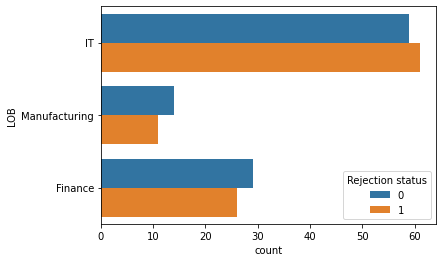

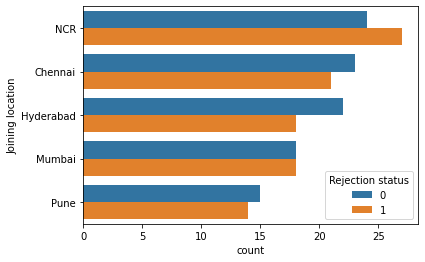

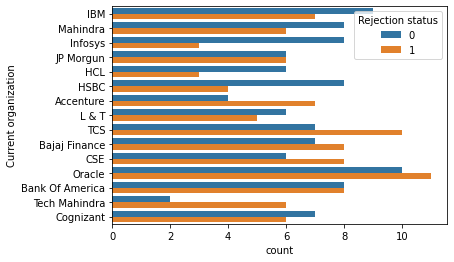

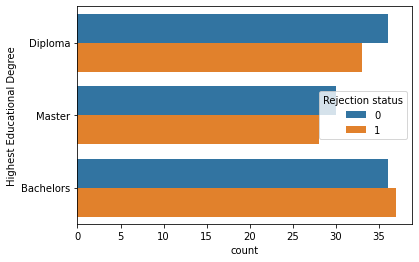

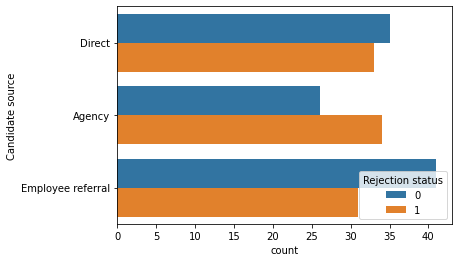

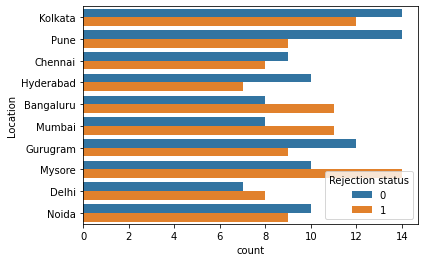

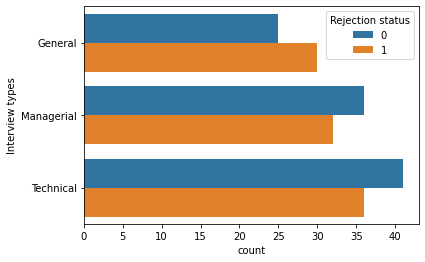

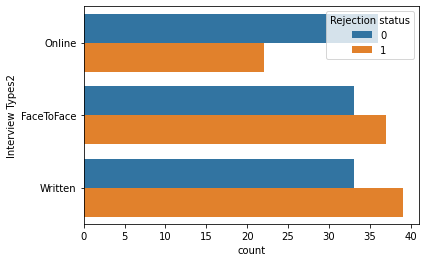

In [8]:
# We loop through the list of Categorical Features and plot the histogram for each with the overlay of the target variable.
import seaborn as sns
Catagorical_features = [
'LOB',
'Joining location',
'Current organization',
'Highest Educational Degree',
'Candidate source',
'Location',
'Interview types',
'Interview Types2']

for i in range (len(Catagorical_features)):
    x=sns.countplot(data=Combinedata, y=Catagorical_features[i], hue="Rejection status")
    plt.show()

From the plots we can see that for each value of the 'LOB' and 'Highest Educational Degree' variables, the variation in the target variable is small. This indicates that the target variable is less dependent on these variables.

On the other hand as the value of the 'Joining location','Current organization','Candidate source', 'Location', 'Interview types' and 'Interview Types2' variables change, the variation in the target variable is large. This indicates that the target variable is more dependent on these variables

The independent variables on which the dependent variable hahigh dependency will play a significant role.

### Box Plots to Find Outliers

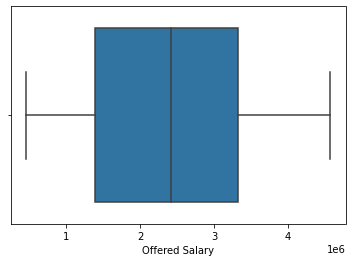

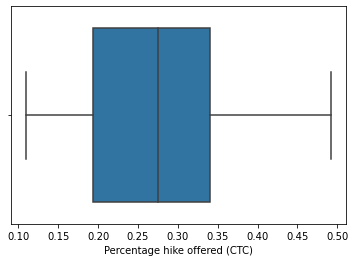

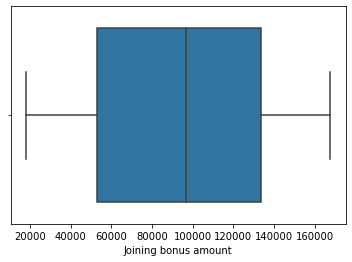

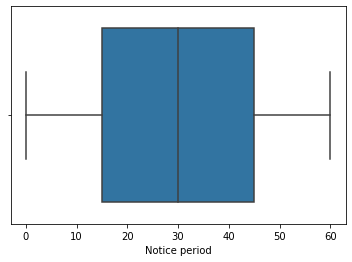

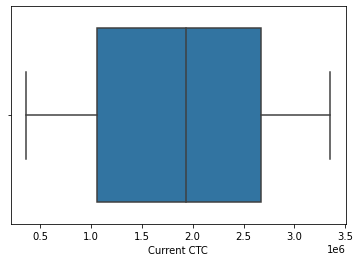

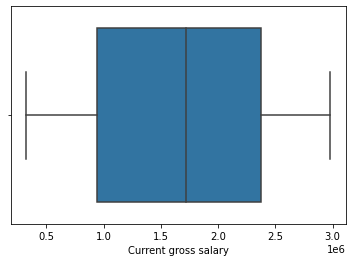

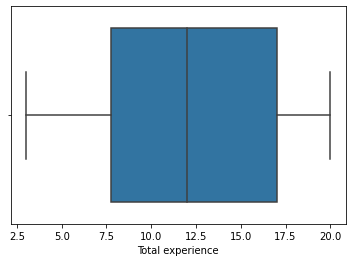

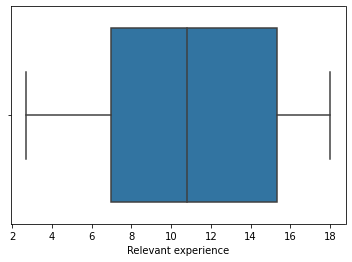

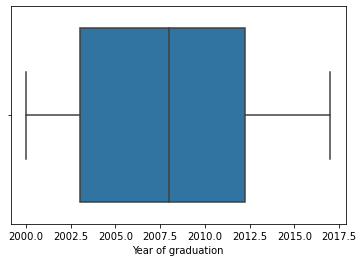

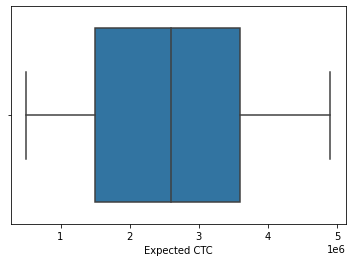

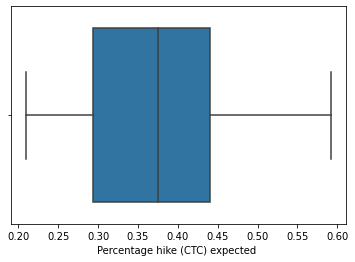

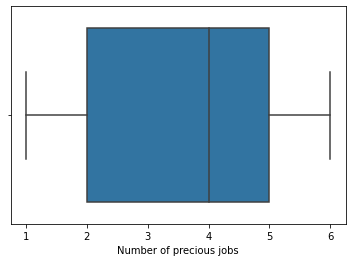

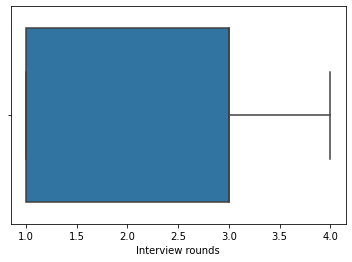

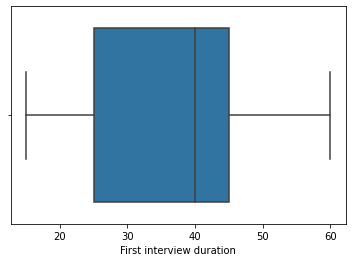

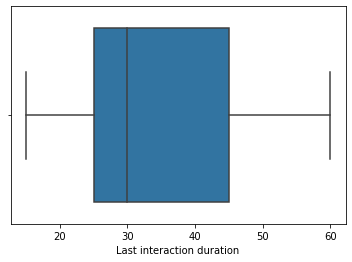

In [9]:
# We loop through the list of Numerical Features and plot the Box plot for each to find the outliers if there are any. 
import seaborn as sns
Numerical_features = ['Offered Salary', 'Percentage hike offered (CTC)',
       'Joining bonus amount', 'Notice period', 'Current CTC',
       'Current gross salary', 'Total experience', 'Relevant experience',
       'Year of graduation', 'Expected CTC', 'Percentage hike (CTC) expected ',
       'Number of precious jobs', 'Interview rounds',
       'First interview duration', 'Last interaction duration']

for i in Numerical_features:
    y=sns.boxplot(data=Combinedata, x=i)
    plt.show()
    

From the analysing the Box Plots we can see that there are no outliers Observed.

### Scatter Plots

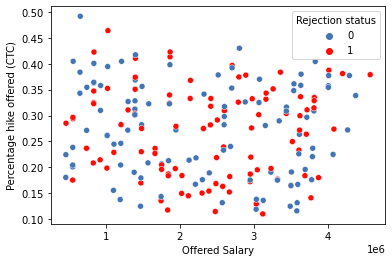

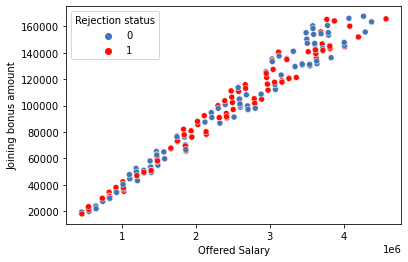

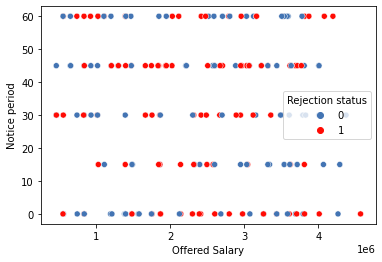

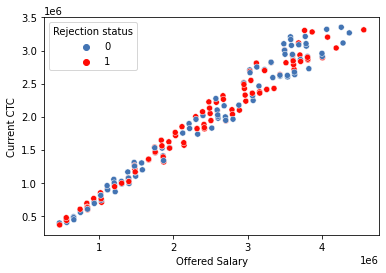

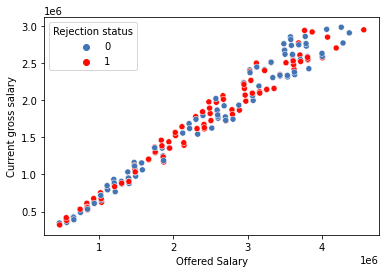

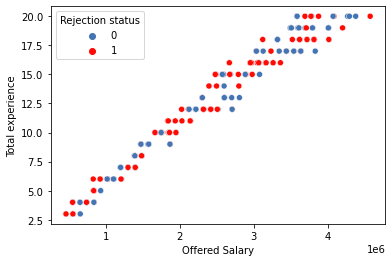

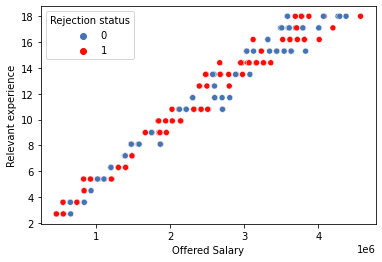

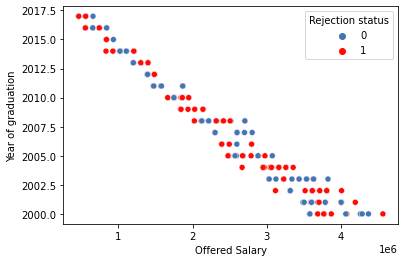

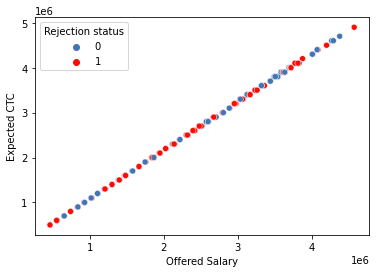

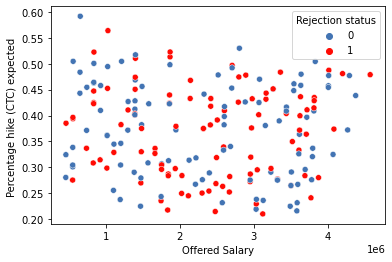

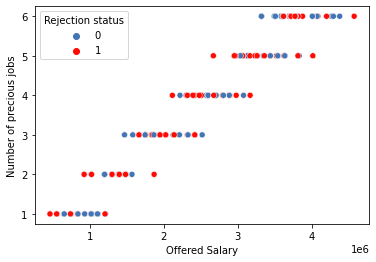

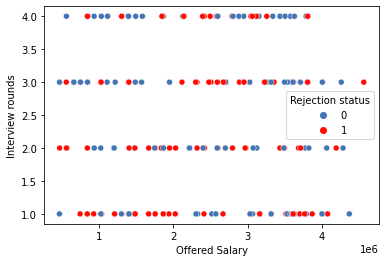

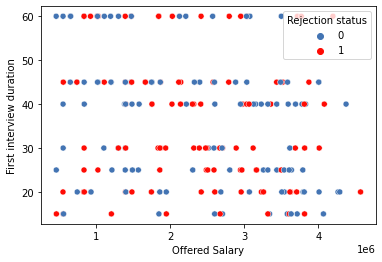

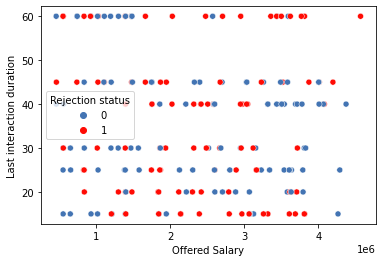

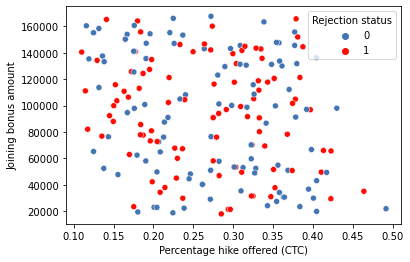

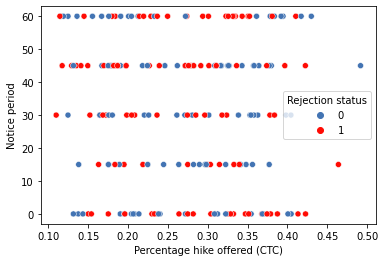

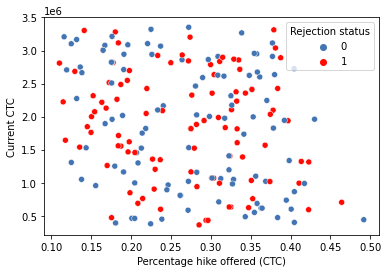

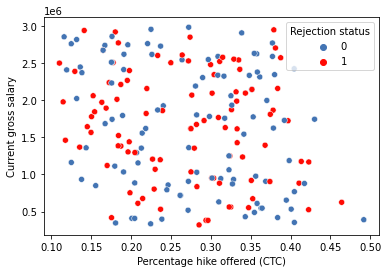

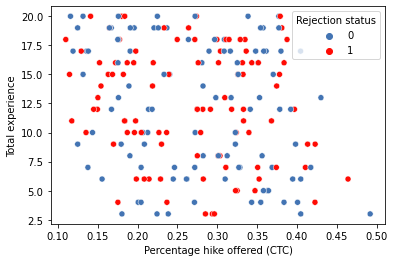

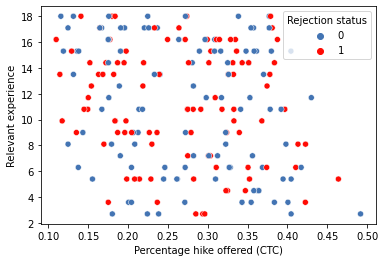

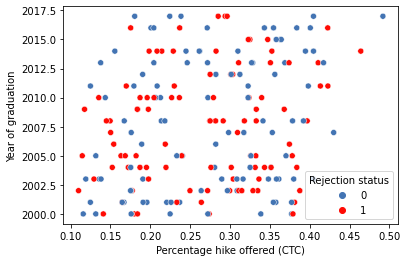

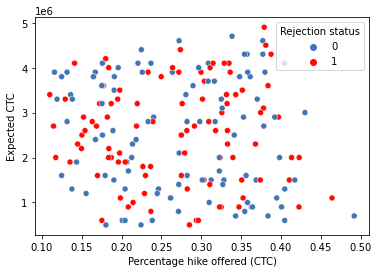

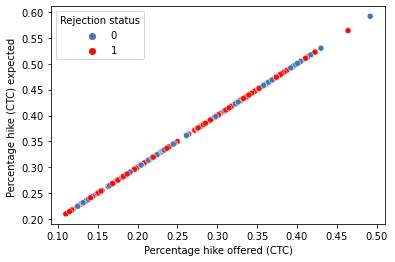

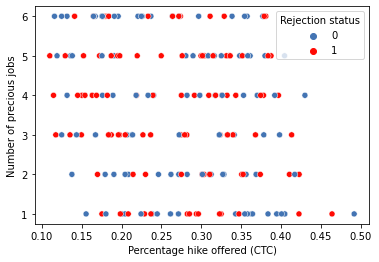

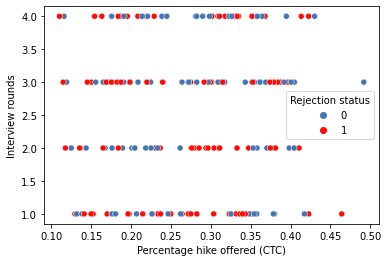

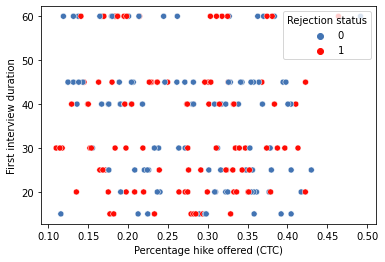

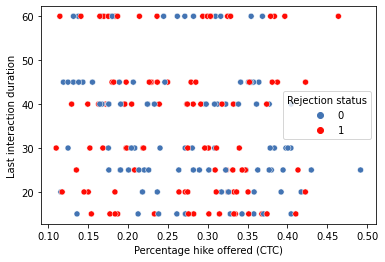

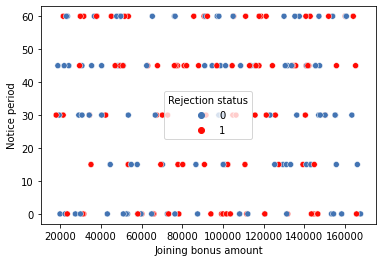

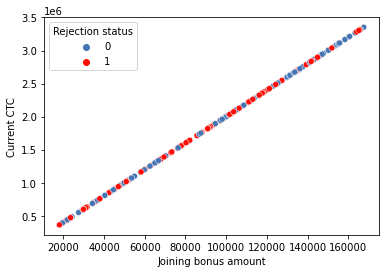

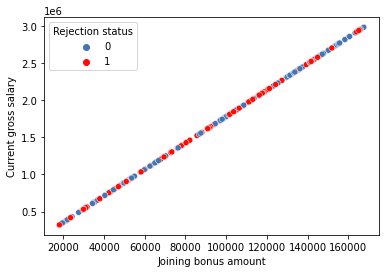

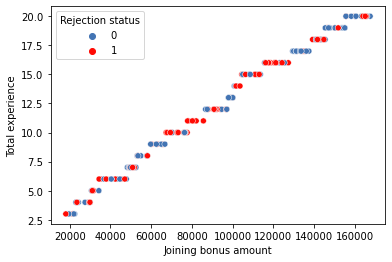

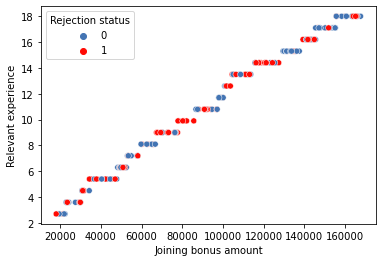

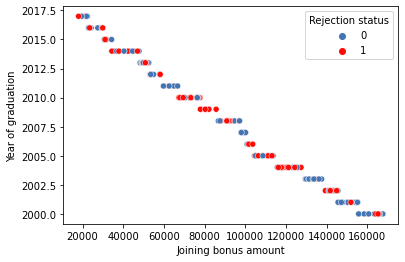

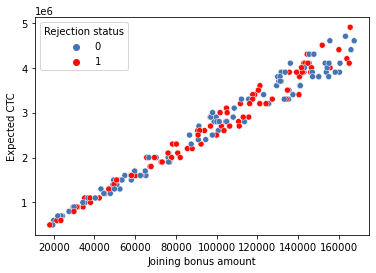

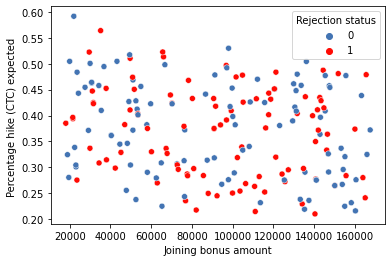

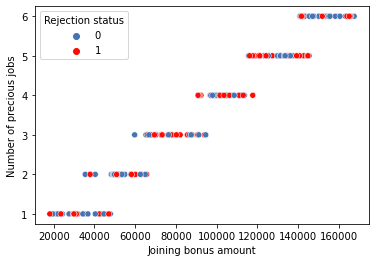

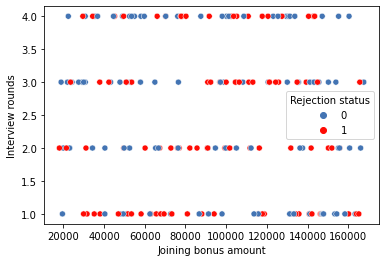

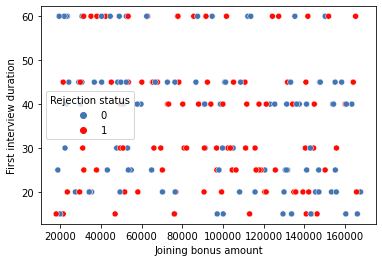

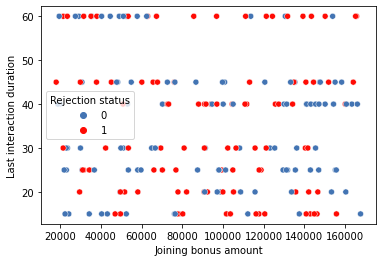

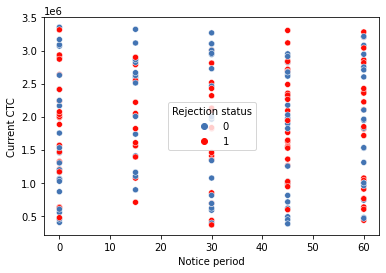

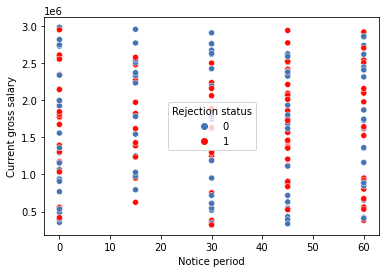

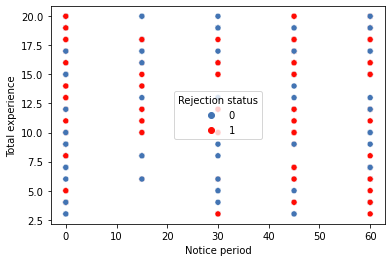

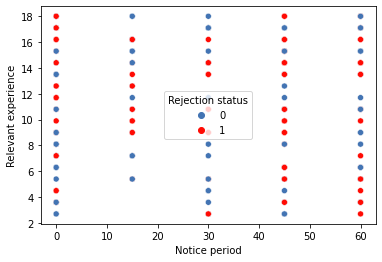

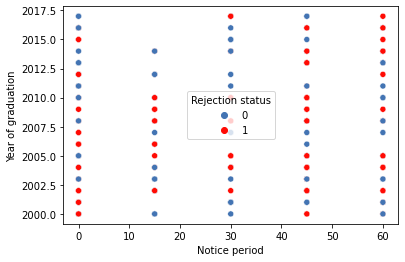

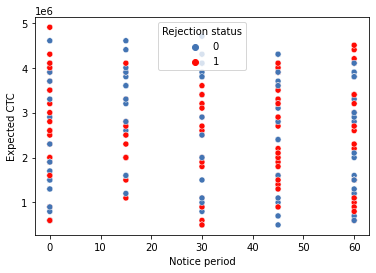

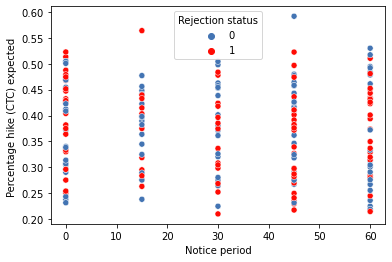

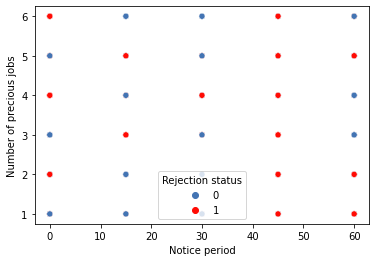

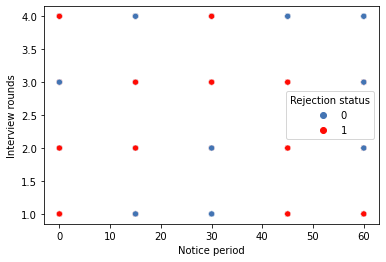

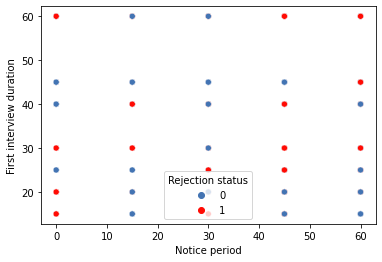

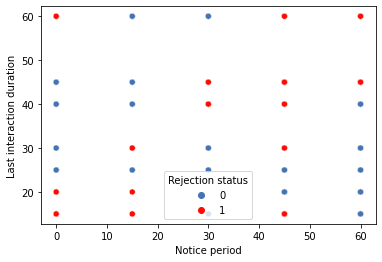

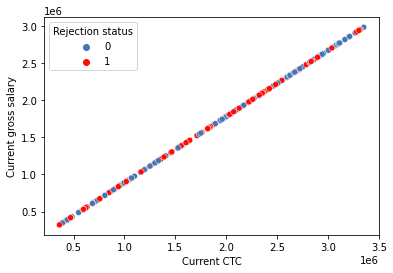

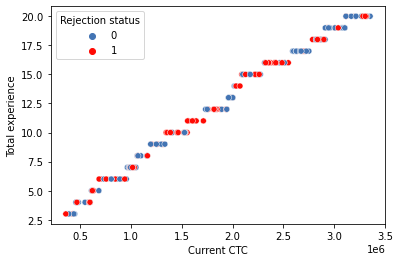

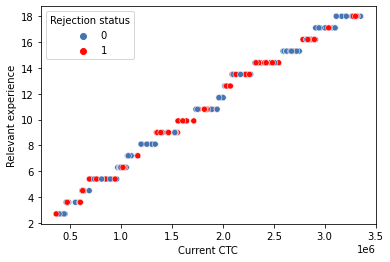

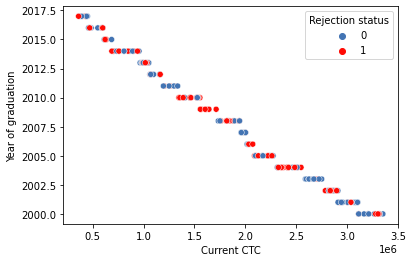

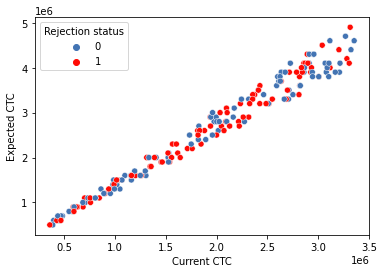

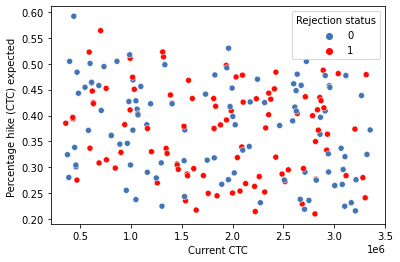

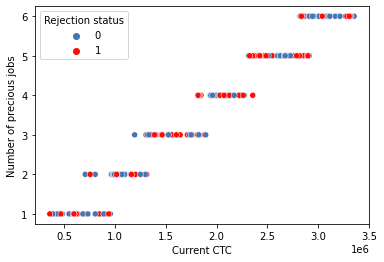

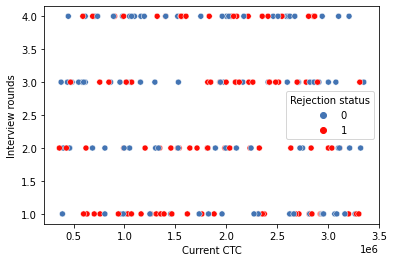

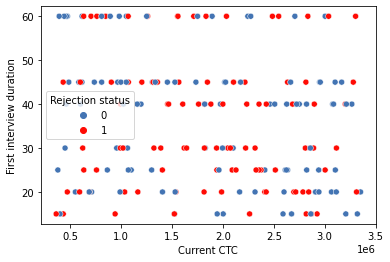

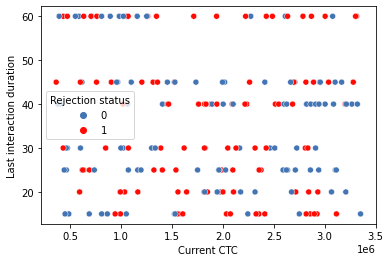

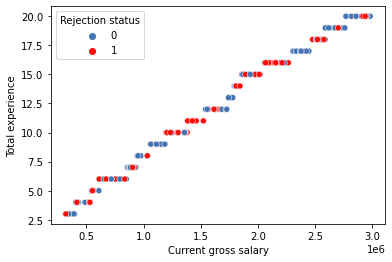

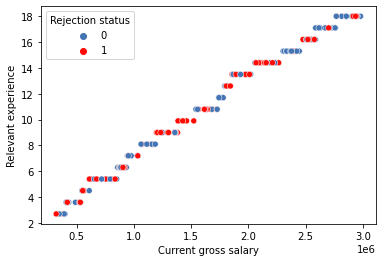

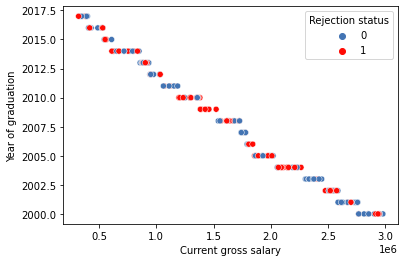

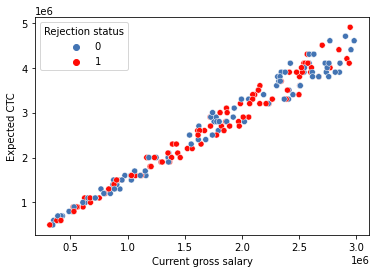

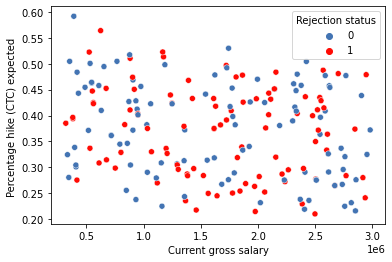

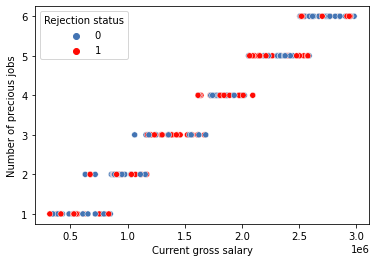

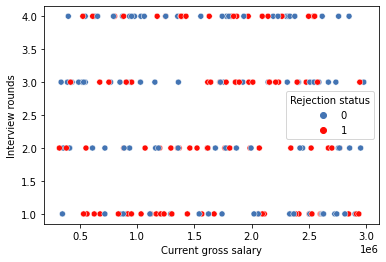

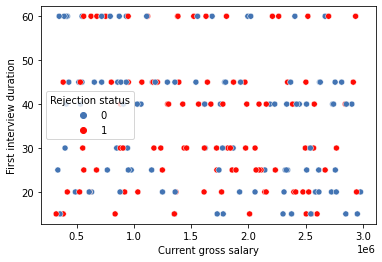

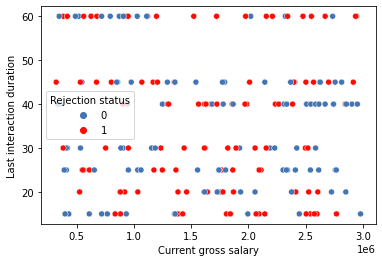

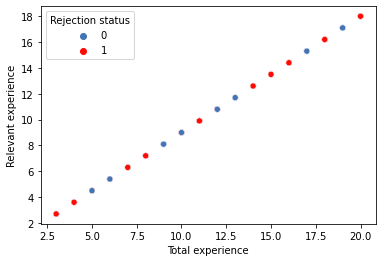

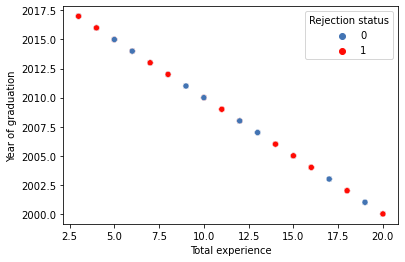

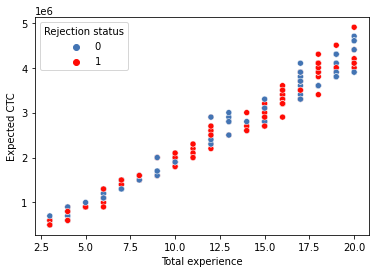

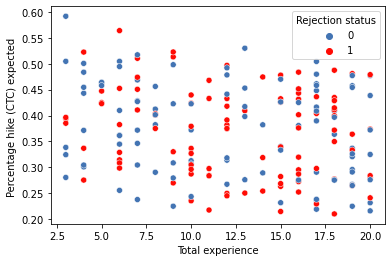

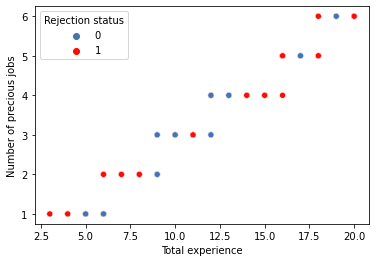

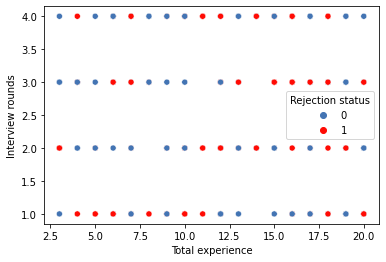

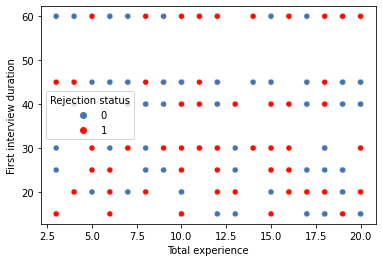

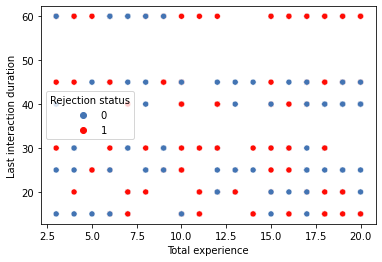

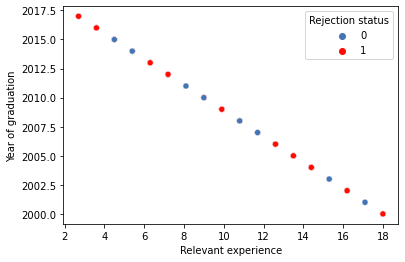

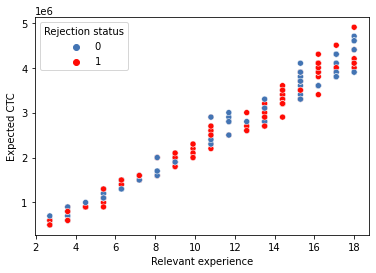

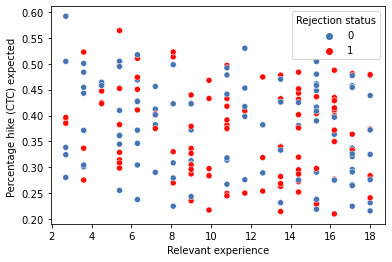

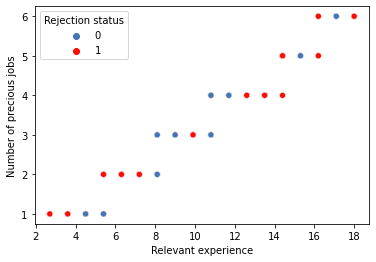

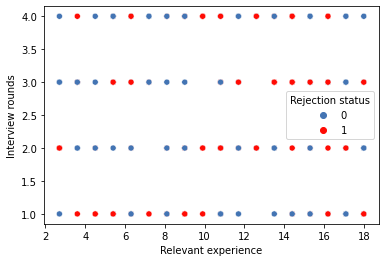

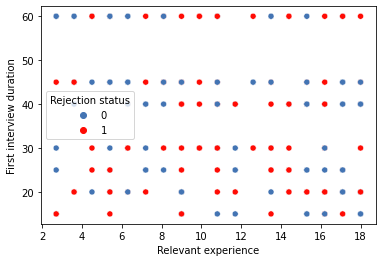

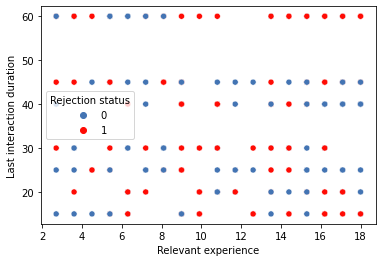

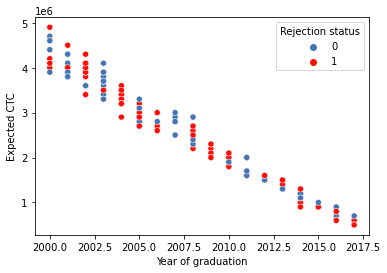

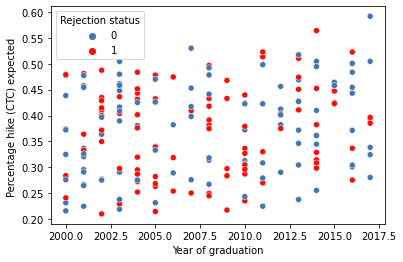

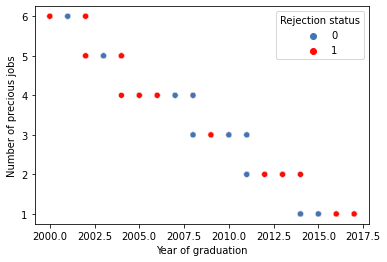

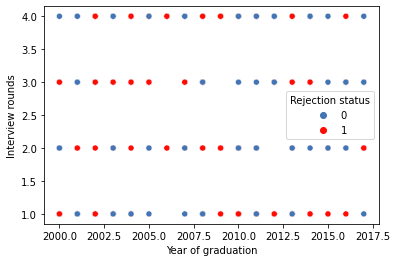

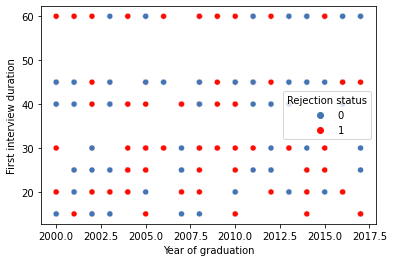

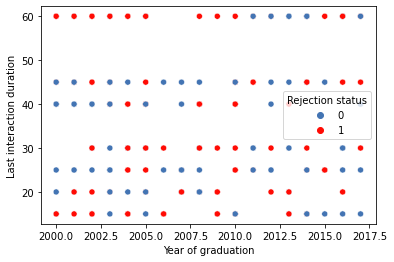

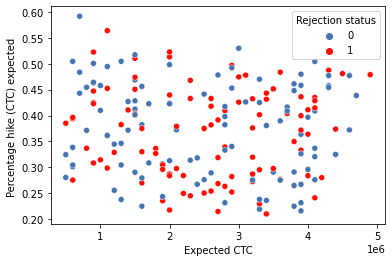

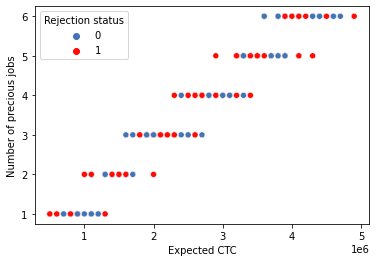

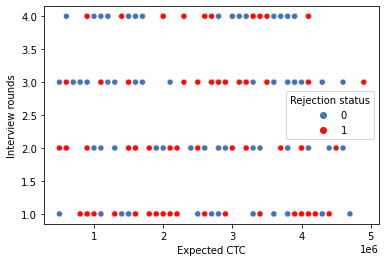

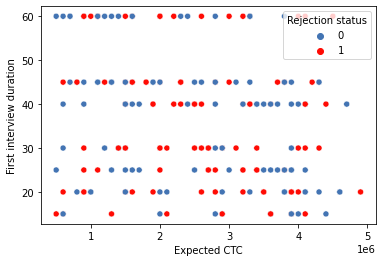

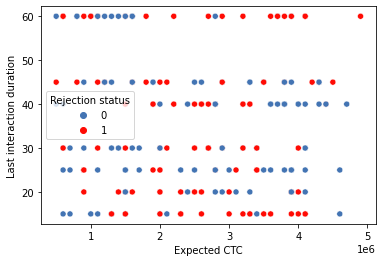

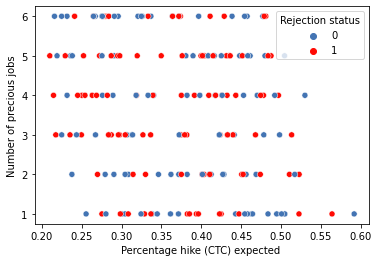

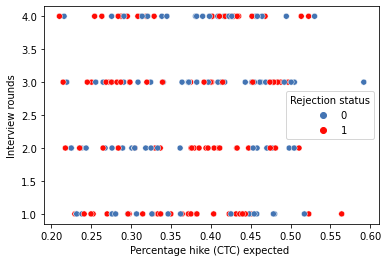

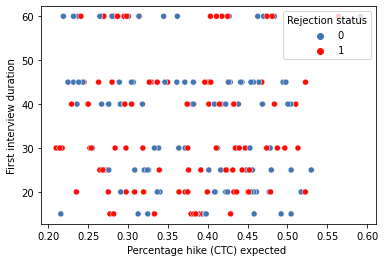

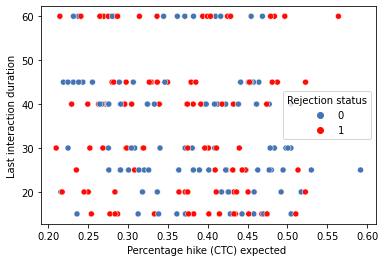

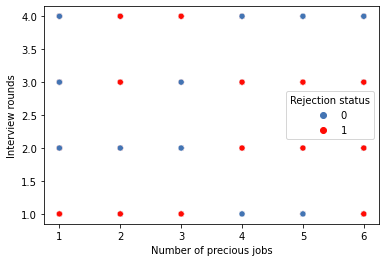

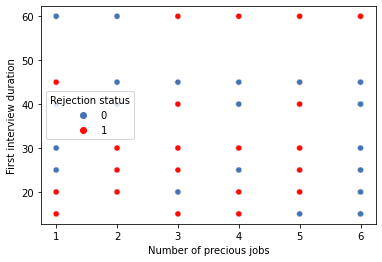

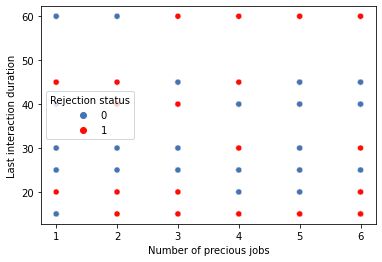

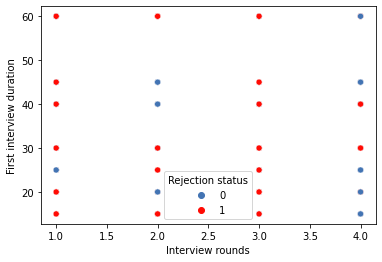

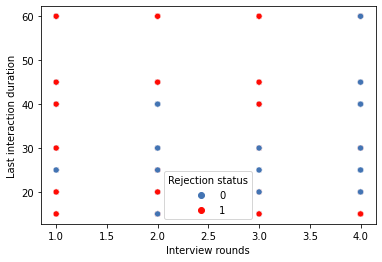

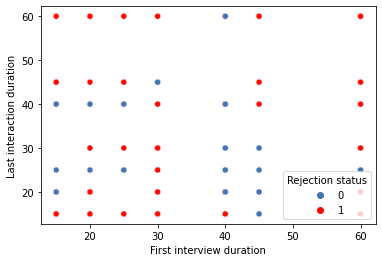

In [10]:
# We loop through the list of Numerical Features and plot the Scatter plot for each feature against the others with
# Target Variable as the hue
for i in range (len(Numerical_features)):
    for j in range(i+1,len(Numerical_features)):
        y=sns.scatterplot(data=Combinedata, x=Numerical_features[i], y=Numerical_features[j], hue="Rejection status",palette=["#4374B3","#FF0B04"])
        plt.show()

# Descriptive Statistics of the Data Set

In [11]:
Combinedata.describe()

,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,Notice period,Current CTC,Current gross salary,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Number of precious jobs,Interview rounds,First interview duration,Last interaction duration,Rejection status
count,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000
mean,2.346565e+06,0.270672,92967.280031,31.275000,1.859346e+06,1.652752e+06,12.280000,11.052000,2007.720000,2.532500e+06,0.370672,3.575000,2.485000,35.700000,35.1250,0.490000
std,1.095181e+06,0.087131,43718.606470,22.038098,8.743721e+05,7.772197e+05,5.242041,4.717837,5.242041,1.181556e+06,0.087131,1.728965,1.125214,14.397794,14.7631,0.501154
min,4.609491e+05,0.109940,18048.881250,0.000000,3.609776e+05,3.208690e+05,3.000000,2.700000,2000.000000,5.000000e+05,0.209940,1.000000,1.000000,15.000000,15.0000,0.000000
25%,1.396196e+06,0.194058,52955.339063,15.000000,1.059107e+06,9.414282e+05,7.750000,6.975000,2003.000000,1.500000e+06,0.294058,2.000000,1.000000,25.000000,25.0000,0.000000
50%,2.414243e+06,0.275515,96949.490625,30.000000,1.938990e+06,1.723546e+06,12.000000,10.800000,2008.000000,2.600000e+06,0.375515,4.000000,3.000000,40.000000,30.0000,0.000000
75%,3.317921e+06,0.340090,133375.598438,45.000000,2.667512e+06,2.371122e+06,17.000000,15.300000,2012.250000,3.600000e+06,0.440090,5.000000,3.000000,45.000000,45.0000,1.000000
max,4.568679e+06,0.491772,167622.243750,60.000000,3.352445e+06,2.979951e+06,20.000000,18.000000,2017.000000,4.900000e+06,0.591772,6.000000,4.000000,60.000000,60.0000,1.000000


Here the <b>count, mean, std, min</b> and <b>max</b> show 
the <b>number of values, average value, the standard deviation, minimum value</b> and <b>maximum value</b> of each column respectively
<b>25%, 50%,75%</b> show the <b>25th percentile(1st quartile), 50th percentile(median/2nd quaritle)</b> and the <b>75th percentile(3rd quartile)</b> respectively
This means that <b>25%</b> of the values in Notice period column are under <b> 15 days, 50% </b> are <b> 30 days</b> etc.

### Cross Tabulation of Categorical Variable Pairs

In [12]:
for m in range(len(Catagorical_features)):
    for n in range(m+1,len(Catagorical_features)):
        x = pd.crosstab(Combinedata[Catagorical_features[m]],Combinedata[Catagorical_features[n]])
        print(x)

Joining location  Chennai  Hyderabad  Mumbai  NCR  Pune
LOB                                                    
Finance                10         12      14   11     8
IT                     29         23      20   30    18
Manufacturing           5          5       2   10     3
Current organization  Accenture  Bajaj Finance  Bank Of America  CSE  \
LOB                                                                    
Finance                       0             15               16    0   
IT                           11              0                0   14   
Manufacturing                 0              0                0    0   

Current organization  Cognizant  HCL  HSBC  IBM  Infosys  JP Morgun  L & T  \
LOB                                                                          
Finance                       0    0    12    0        0         12      0   
IT                           13    9     0   16       11          0      0   
Manufacturing                 0    0     0    0

Location                    Bangaluru  Chennai  Delhi  Gurugram  Hyderabad  \
Highest Educational Degree                                                   
Bachelors                           5        6      4         7          8   
Diploma                            12        5      4         4          7   
Master                              2        6      7        10          2   

Location                    Kolkata  Mumbai  Mysore  Noida  Pune  
Highest Educational Degree                                        
Bachelors                        10       9       5      8    11  
Diploma                          11       5       8      5     8  
Master                            5       5      11      6     4  
Interview types             General  Managerial  Technical
Highest Educational Degree                                
Bachelors                        22          28         23
Diploma                          11          24         34
Master                           22   

The cross tabulation of pairs of categorical features gives us a frequency correlation of the values of the pair of variables.


In [13]:
import altair as alt
from altair import Chart
alt.data_transformers.disable_max_rows()

Chart(Combinedata).mark_bar(
).encode(
    y='Number of precious jobs',
    x='count(Number of precious jobs)',
    color='Rejection status'
)

# # We loop through the list of Numerical Features and plot the chart for each feature against the Target Variable 
# for i in Numerical_features:
#     Chart(Combinedata).mark_bar(
#     ).encode(
#         y="'"+i+"'",
#         x="'count("+i+")'",
#         color='Rejection status'
#     )


alt.Chart(...)

### EDA Report is Generated by Using Sweetviz Library

In [14]:
##Report attached eda_report.html

import sweetviz as sv
# Analyzing data
report=sv.analyze(Combinedata)
# Generating report
report.show_html('eda_report.html')


Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
# !pip3 install sweetviz

### Graph Between Target Variable and Timeseries Data

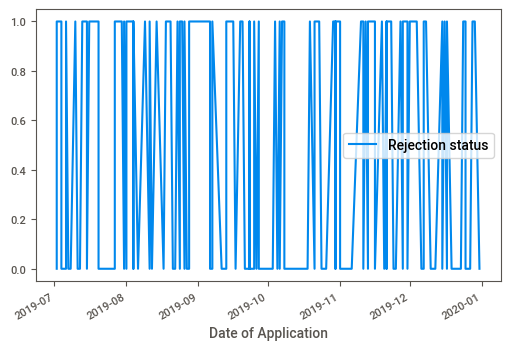

In [16]:
# To plot a graph between time series and target, converted Acceptance statusin binary attributes
# Combinedata['Acceptance status']=Combinedata['Acceptance status'].replace(to_replace="Joined",value=0)
# Combinedata['Acceptance status']=Combinedata['Acceptance status'].replace(to_replace="Offer Rejected",value=1)
Combinedata.plot(x='Date of Application', y='Rejection status');
